In [1]:
#el metodo del codo y el factor de la silueta del clustering

In [2]:
import pandas
import numpy
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score

In [3]:
x1=numpy.array([3,1,1,2,1,6,6,6,5,6,7,8,9,8,9,9,8])
x2=numpy.array([5,4,5,6,5,8,6,7,6,7,1,2,1,2,3,2,3])
X=numpy.array(list(zip(x1,x2))).reshape(len(x1),2)

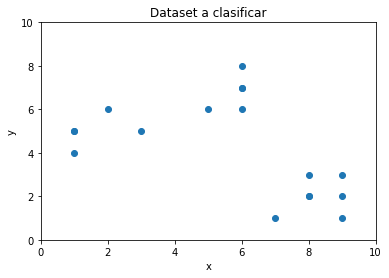

In [4]:
plt.plot()
plt.xlim([0,10])
plt.ylim([0,10])
plt.title("Dataset a clasificar")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x1,x2)
plt.show()

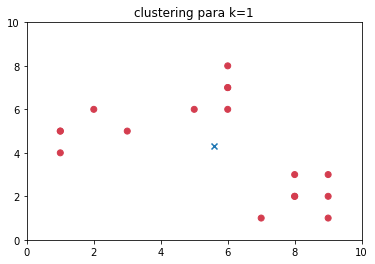

* Para k =  2  el p romedio de la silueta es de :  0.6113424368705715
   - Para i =  1  la silueta del cluster vale :  0.49704450958269375
   - Para i =  2  la silueta del cluster vale :  0.7746251901389686


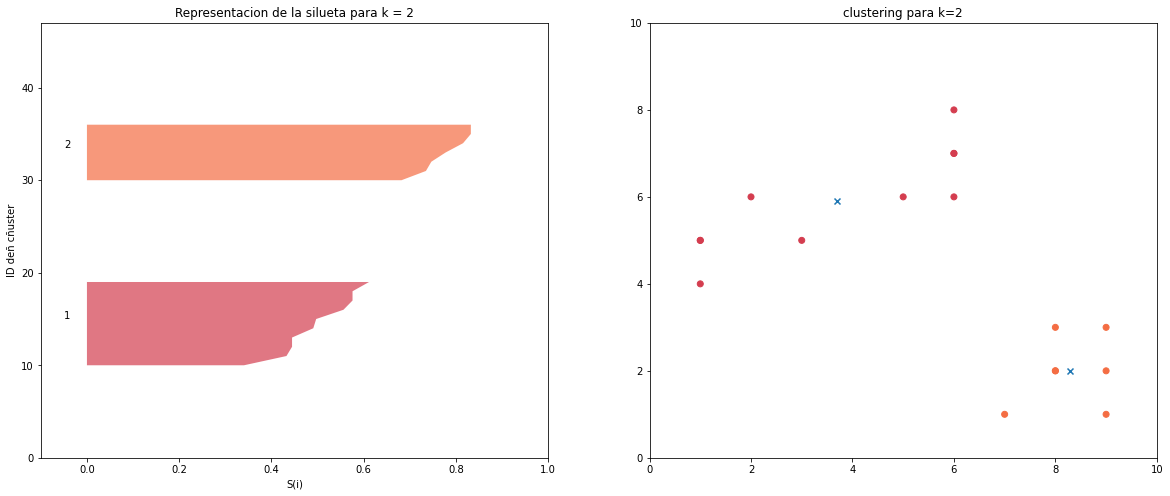

* Para k =  3  el p romedio de la silueta es de :  0.7122079383287169
   - Para i =  1  la silueta del cluster vale :  0.7322200728725188
   - Para i =  2  la silueta del cluster vale :  0.7345257364682265
   - Para i =  3  la silueta del cluster vale :  0.6609508863896014


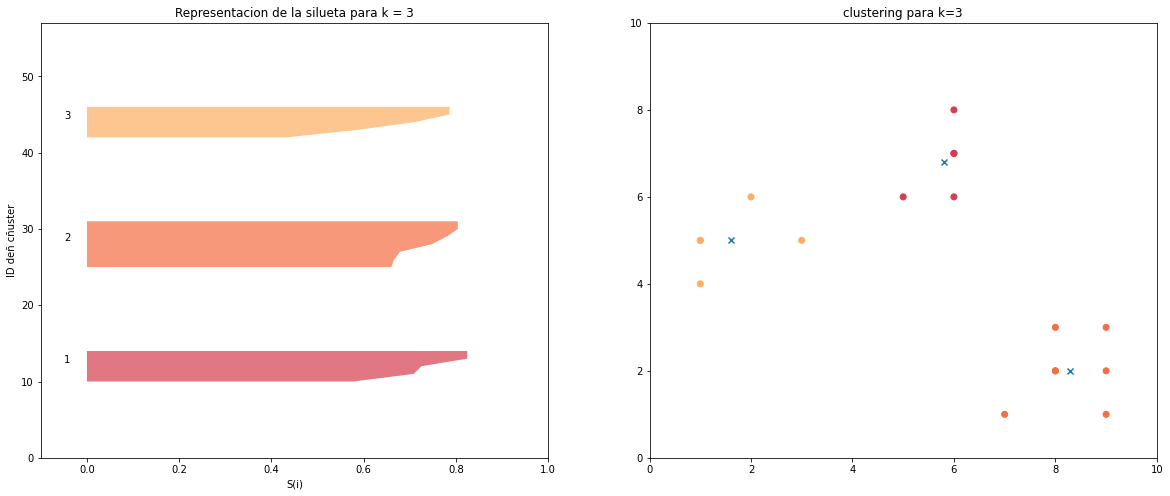

* Para k =  4  el p romedio de la silueta es de :  0.6389948643127632
   - Para i =  1  la silueta del cluster vale :  0.24096929517637128
   - Para i =  2  la silueta del cluster vale :  0.7345257364682265
   - Para i =  3  la silueta del cluster vale :  0.654458796162702
   - Para i =  4  la silueta del cluster vale :  0.655666655624379


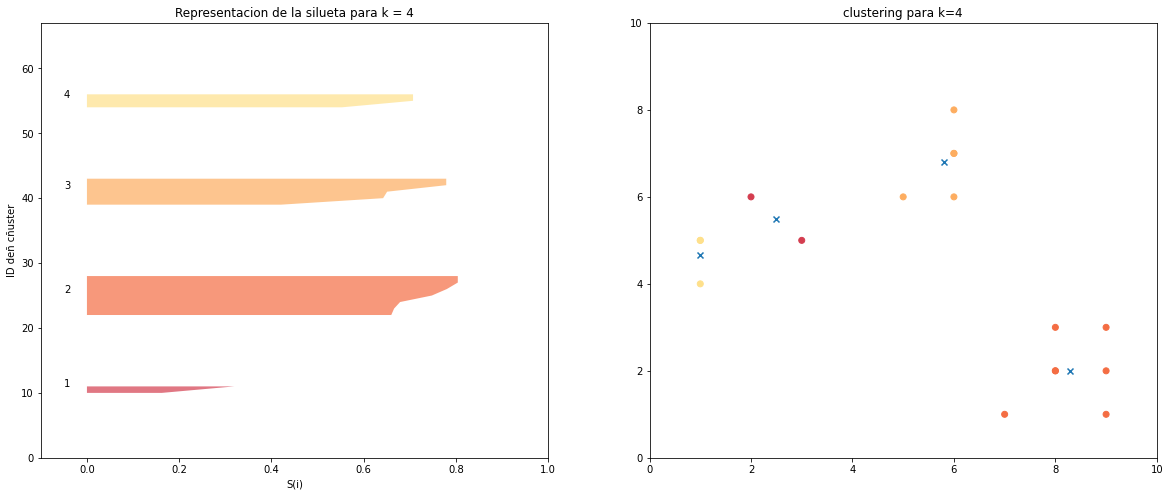

* Para k =  5  el p romedio de la silueta es de :  0.4337431629436393
   - Para i =  1  la silueta del cluster vale :  0.2777436957346689
   - Para i =  2  la silueta del cluster vale :  0.24096929517637128
   - Para i =  3  la silueta del cluster vale :  0.654458796162702
   - Para i =  4  la silueta del cluster vale :  0.655666655624379
   - Para i =  5  la silueta del cluster vale :  0.1804754830212678


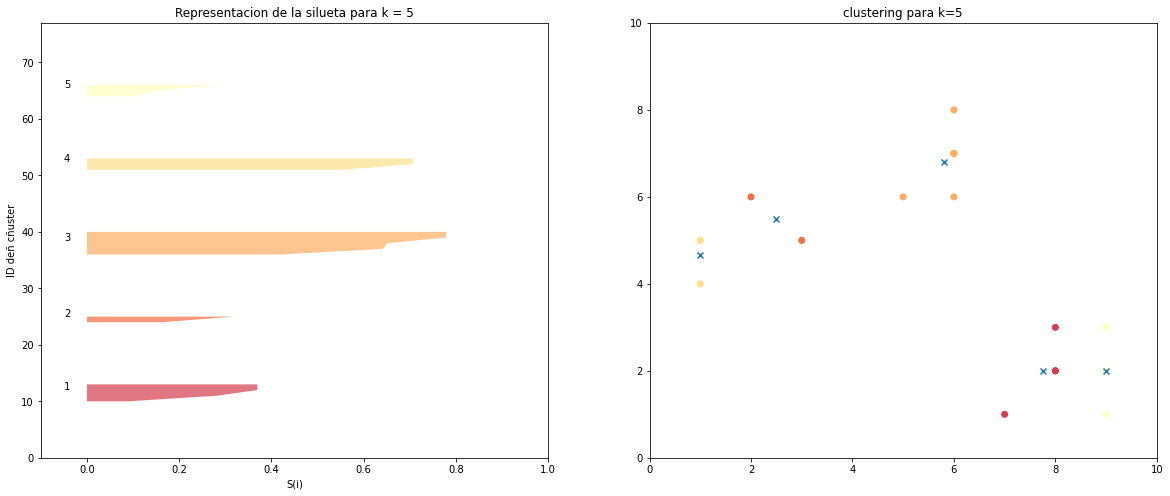

* Para k =  6  el p romedio de la silueta es de :  0.4159974962395202
   - Para i =  1  la silueta del cluster vale :  0.37765685097302226
   - Para i =  2  la silueta del cluster vale :  0.24096929517637128
   - Para i =  3  la silueta del cluster vale :  0.5664789734180768
   - Para i =  4  la silueta del cluster vale :  0.32882042637679976
   - Para i =  5  la silueta del cluster vale :  0.655666655624379
   - Para i =  6  la silueta del cluster vale :  0.0


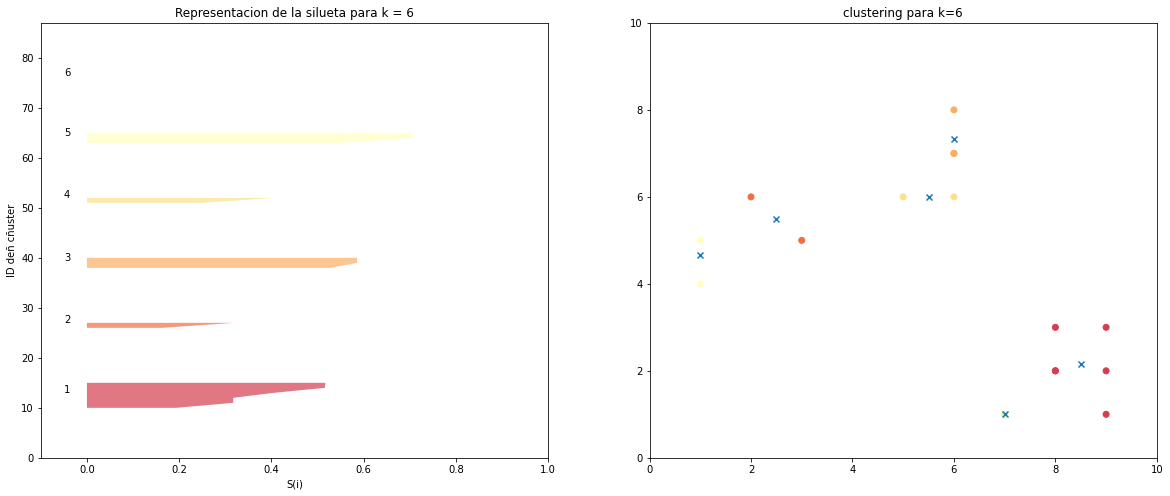

* Para k =  7  el p romedio de la silueta es de :  0.38051167659761514
   - Para i =  1  la silueta del cluster vale :  0.32882042637679976
   - Para i =  2  la silueta del cluster vale :  0.37765685097302226
   - Para i =  3  la silueta del cluster vale :  0.6152265411044983
   - Para i =  4  la silueta del cluster vale :  0.5664789734180768
   - Para i =  5  la silueta del cluster vale :  0.0
   - Para i =  6  la silueta del cluster vale :  0.0
   - Para i =  7  la silueta del cluster vale :  0.0


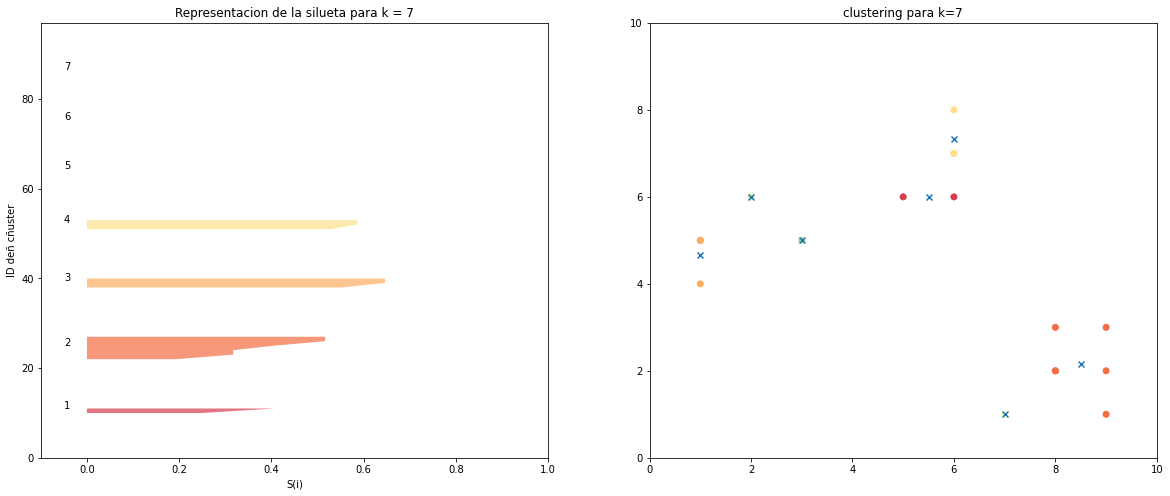

* Para k =  8  el p romedio de la silueta es de :  0.3236513794583788
   - Para i =  1  la silueta del cluster vale :  0.11740967060119306
   - Para i =  2  la silueta del cluster vale :  0.5664789734180768
   - Para i =  3  la silueta del cluster vale :  0.6152265411044983
   - Para i =  4  la silueta del cluster vale :  0.31569568088917843
   - Para i =  5  la silueta del cluster vale :  0.0
   - Para i =  6  la silueta del cluster vale :  0.0
   - Para i =  7  la silueta del cluster vale :  0.32882042637679976
   - Para i =  8  la silueta del cluster vale :  0.0


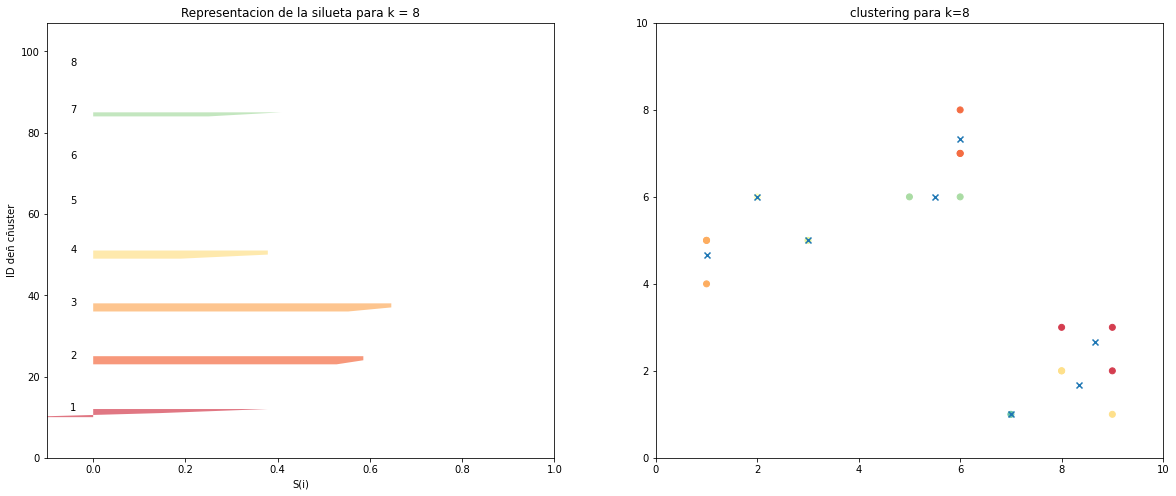

* Para k =  9  el p romedio de la silueta es de :  0.33600229354373845
   - Para i =  1  la silueta del cluster vale :  0.6152265411044983
   - Para i =  2  la silueta del cluster vale :  0.16885435933420914
   - Para i =  3  la silueta del cluster vale :  0.5664789734180768
   - Para i =  4  la silueta del cluster vale :  0.39052429175126996
   - Para i =  5  la silueta del cluster vale :  0.0
   - Para i =  6  la silueta del cluster vale :  0.32882042637679976
   - Para i =  7  la silueta del cluster vale :  0.0
   - Para i =  8  la silueta del cluster vale :  0.0
   - Para i =  9  la silueta del cluster vale :  0.0


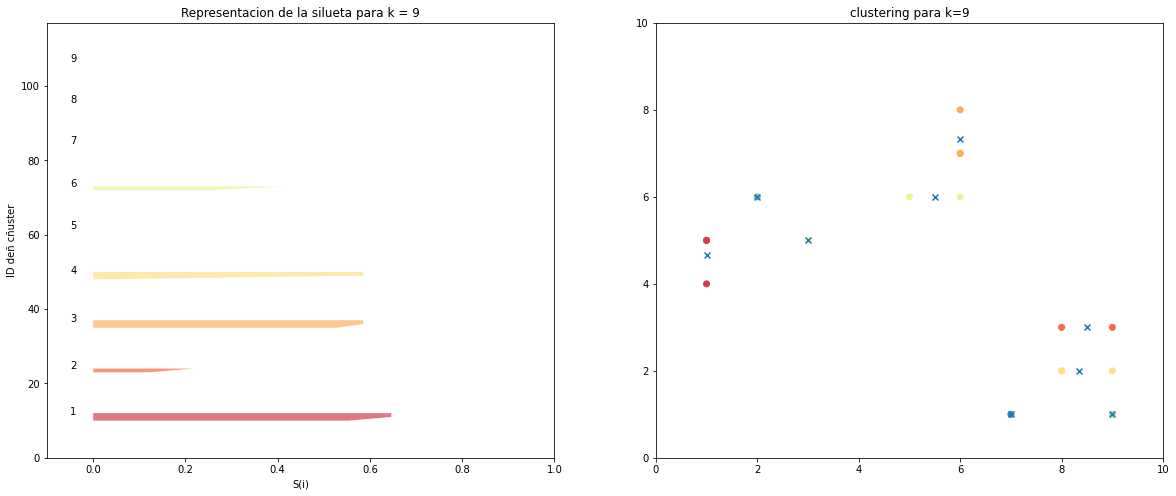

In [24]:
max_k=10#maximo numero de clusters
K=range(1,max_k)#llega hasta el 9
ssw=[]
cmap = plt.cm.get_cmap("Spectral")
color_palette=[cmap(float(i)/max_k) for i in K]
centroid=[sum(X)/len(X) for i in K]
sst=sum(numpy.min(cdist(X,centroid,"euclidean"),axis=1))

for k in K:
    kmeanModel=KMeans(n_clusters=k).fit(X)
    
    centers=pandas.DataFrame(kmeanModel.cluster_centers_)
    labels=kmeanModel.labels_

    ssw_k=sum(numpy.min(cdist(X,centers,"euclidean"),axis=1))
    ssw.append(ssw_k)

    label_color=[color_palette[i] for i in labels]
    
    #Fabricar una silueta para cada cluster 
    #solo se puede hacer una silueta cuando hay mas de un cluster
    if 1<k<len(X):
        #crear un subplot de una fila y dos columnas
        fig, (axis1,axis2)=plt.subplots(1,2)
        fig.set_size_inches(20,8)

        #el primer subplot contendra la silueta, que puede tener valores desde -1 a 1
        #en este caso, ya se controla que los valores estan entre -0.1 y 1
        axis1.set_xlim([-0.1,1.0])
        #el numeri de custers a insetar determinara el tamaño de cada barra
        #el coeficiente (n_clusters+1)*10 sera el espacio en blanco que dejaremos entresiluetas individuales de cada cluster para separarlas
        axis1.set_ylim([0,len(X)+(k+1)*10])

        silhouette_avg=silhouette_score(X,labels)
        print("* Para k = ",k," el p romedio de la silueta es de : ",silhouette_avg)
        sample_silhouette_values=silhouette_samples(X,labels)

        y_lower=10
        for i in range(k):
            #Agregamos la silueta del cluster i-esimo
            ith_cluster_av=sample_silhouette_values[labels==i]
            print("   - Para i = ",i+1," la silueta del cluster vale : ",numpy.mean(ith_cluster_av))
            #ordenamos descendientemente las siluetas del cluster i-esimo
            ith_cluster_av.sort()

            #calculamos donde colocar la primer silueta en el eje vertical
            ith_cluster_size=ith_cluster_av.shape[0]
            y_upper=y_lower+ith_cluster_size
            #elegimos el color del cluster
            color=color_palette[i]

            #pintamos la silueta del cluster i-esimo
            axis1.fill_betweenx(numpy.arange(y_lower,y_upper),0,ith_cluster_av,facecolor=color,alpha=0.7)

            #etiquetamos dicho cluster cno el numero en el centro
            axis1.text(-0.05,y_lower+0.5*ith_cluster_size,str((i+1)))

            #calculamos el nuevo y_lower para el siguiente cluster del grafico
            y_lower=y_upper+10 #dejamos vacias 10 posiciones sin muestra
        axis1.set_title("Representacion de la silueta para k = %s"%str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("ID deñ cñuster")
    
        ##fin de los k-means con los puntos respectivo
    #Plot de los k_means con los puntos respectivos
    plt.plot()
    plt.xlim([0,10])
    plt.ylim([0,10])
    plt.title("clustering para k=%s"%str(k))
    plt.scatter(x1,x2,c=label_color)
    plt.scatter(centers[0],centers[1],cmap=color_palette,marker="x")
    plt.show()


Text(0.5, 1.0, 'La tecnica del codo para encontrar el K optimo')

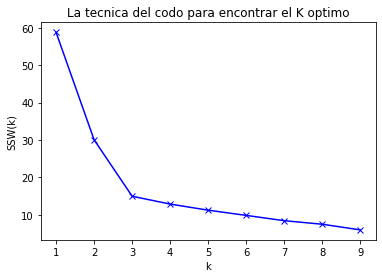

In [25]:
#Representacion  del codo
plt.plot(K,ssw,"bx-")
plt.xlabel("k")
plt.ylabel("SSW(k)")
plt.title("La tecnica del codo para encontrar el K optimo")